<a href="https://colab.research.google.com/github/mas23080339-dev/Group-6/blob/main/CBF_Demo_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Đọc file dataset

In [8]:
!pip install underthesea
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from underthesea import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
import nltk
import matplotlib.pyplot as plt

In [10]:
#1. ĐỌC FILE DATA
selling_data = pd.read_csv('/content/Gr6.csv')

In [11]:
# IN VÀI DÒNG ĐẦU
selling_data.head()

,Tên sản phẩm,Mô tả,Từ khóa,Giá,Thương hiệu,Điểm đánh giá
0,Adidas Essentials Tee,Chiếc áo thun unisex này được làm từ cotton 10...,"áo thun unisex, cotton, màu trắng, basic, cổ t...",450000,Adidas,4.6
1,Adidas Sport Performance Tee,Chiếc áo thun nam này được làm từ polyester th...,"áo thun nam, polyester thoáng khí, màu đen, si...",520000,Adidas,4.8
2,Adidas Graphic Print Tee,Chiếc áo thun nữ này được làm từ cotton mềm ph...,"áo thun nữ, cotton pha elastane, màu xám, size...",490000,Adidas,4.7
3,Adidas Run It Tee,Chiếc áo thun unisex này được làm từ poly-cott...,"áo thun unisex, poly-cotton nhẹ, màu xanh navy...",550000,Adidas,4.9
4,Adidas Aeroready Training Tee,Chiếc áo thun nam này được làm từ chất liệu Ae...,"áo thun nam, Aeroready siêu thoáng mát, màu đe...",600000,Adidas,4.8


In [12]:
# ĐẾM SỐ DÒNG VÀ SỐ CỘT TRONG DATA

selling_data.shape

(298, 6)

2. Tiền xử lý dữ liệu

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Chuẩn hóa cột Từ khóa
selling_data["Từ khóa"] = selling_data["Từ khóa"].fillna("").str.replace(";", " ")

In [15]:
# CHỌN FEATURES ĐỂ RECOMMENDATIOIN

selected_features = ['Tên sản phẩm','Mô tả','Từ khóa','Thương hiệu']
print(selected_features)

['Tên sản phẩm', 'Mô tả', 'Từ khóa', 'Thương hiệu']


In [16]:
# combining all the 5 selected features

combined_features = selling_data['Tên sản phẩm']+' '+selling_data['Mô tả']+' '+selling_data['Từ khóa']+' '+selling_data['Thương hiệu'].astype(str)

In [17]:
print(combined_features)

0      Adidas Essentials Tee Chiếc áo thun unisex này...
1      Adidas Sport Performance Tee Chiếc áo thun nam...
2      Adidas Graphic Print Tee Chiếc áo thun nữ này ...
3      Adidas Run It Tee Chiếc áo thun unisex này đượ...
4      Adidas Aeroready Training Tee Chiếc áo thun na...
                             ...                        
293    Áo đấu Sân khách Nam Manchester City 24/25 Nếu...
294    Giày Đá Bóng FUTURE 8 ULTIMATE FG Unisex  Ở ph...
295    Mũ chạy bộ 5 mảnh vành ngắn Giúp bạn luôn phon...
296    Mũ Len High-Crown Kim Loại Báo PUMA Hoàn thiện...
297    Mũ chạy bộ 5 mảnh ESS Luôn năng động và phong ...
Length: 298, dtype: object


In [18]:
 # Chuẩn hóa: chuyển chữ thường
selling_data['combined_features'] = combined_features.str.lower()

In [19]:
# Tokenization + lọc stopwords
def tokenize_and_filter(text):
    tokens = word_tokenize(str(text))
    tokens = [t for t in tokens if t not in all_stopwords and t.strip() != '']
    return tokens

In [20]:
 # Tạo bigram (cụm 2 từ) để giữ các từ ghép
def add_bigrams(tokens):
    bigrams = ['_'.join(bg) for bg in ngrams(tokens, 2)]
    return tokens + bigrams

In [21]:
all_stopwords = stopwords.words('english') # Define all_stopwords here
selling_data['tokens'] = selling_data['combined_features'].apply(tokenize_and_filter)
selling_data['tokens_with_bigrams'] = selling_data['tokens'].apply(add_bigrams)

In [22]:
# In 10 dòng đầu để kiểm tra
print(selling_data[['combined_features', 'tokens_with_bigrams']].head(10))

                                   combined_features  \
0  adidas essentials tee chiếc áo thun unisex này...   
1  adidas sport performance tee chiếc áo thun nam...   
2  adidas graphic print tee chiếc áo thun nữ này ...   
3  adidas run it tee chiếc áo thun unisex này đượ...   
4  adidas aeroready training tee chiếc áo thun na...   
5  adidas originals trefoil tee chiếc áo thun uni...   
6  adidas yoga comfort tee chiếc áo thun nữ này đ...   
7  adidas heatready tee chiếc áo thun unisex này ...   
8  adidas crop top tee chiếc áo thun nữ này được ...   
9  adidas classic backpack chiếc balo unisex này ...   

                                 tokens_with_bigrams  
0  [adidas, essentials, tee, chiếc, áo, thun, uni...  
1  [adidas, sport, performance, tee, chiếc, áo, t...  
2  [adidas, graphic, print, tee, chiếc, áo, thun,...  
3  [adidas, run, tee, chiếc, áo, thun, unisex, nà...  
4  [adidas, aeroready, training, tee, chiếc, áo, ...  
5  [adidas, originals, trefoil, tee, chiếc, áo, t... 

In [23]:
# CHUYỂN VĂN BẢN THÀNH CÁC VECTO
vectorizer = TfidfVectorizer()

In [24]:
# chuyển các văn bản đã kết hợp thành vector số
feature_vectors = vectorizer.fit_transform(combined_features)

In [25]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19560 stored elements and shape (298, 1843)>
  Coords	Values
  (0, 93)	0.15601942795065626
  (0, 465)	0.1562614374183765
  (0, 1377)	0.10126583756729418
  (0, 236)	0.0748238137308046
  (0, 1735)	0.2446950381347905
  (0, 1405)	0.20253167513458836
  (0, 1611)	0.11541798908972445
  (0, 1055)	0.07439452521285717
  (0, 1788)	0.06110835579742313
  (0, 804)	0.06720628033514928
  (0, 1603)	0.05721788600865413
  (0, 310)	0.15320730617180367
  (0, 5)	0.13498623523043776
  (0, 944)	0.1371720030866281
  (0, 947)	0.19133945480159179
  (0, 908)	0.08366503032694973
  (0, 1522)	0.17629205938048245
  (0, 1285)	0.11641617786962792
  (0, 1699)	0.2215712355463303
  (0, 1675)	0.04644123330437763
  (0, 747)	0.0707793364503862
  (0, 415)	0.05820808893481396
  (0, 126)	0.25386664783045954
  (0, 368)	0.15140166843007277
  (0, 1506)	0.22442697171947287
  :	:
  (297, 1032)	0.11378730042215018
  (297, 1643)	0.07214695479188199
  (297, 1123)	0.052856198

3. Trực quan hóa (Visualization)

TRỰC QUAN HÓA DỮ LIỆU
Thống kê mô tả (Điểm đánh giá):
count     298
unique     20
top       4.6
freq       51


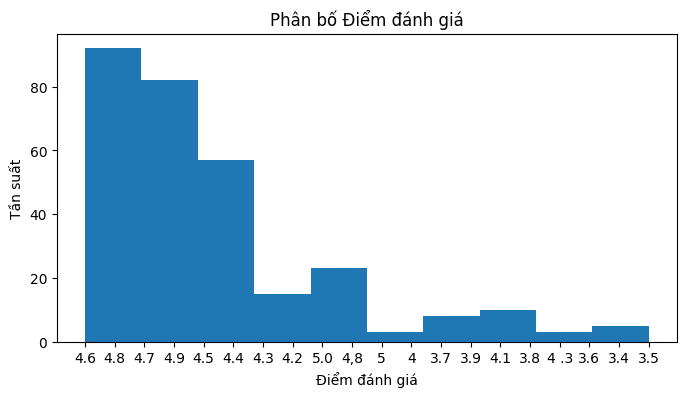

Tổng số từ khóa được sử dụng: 13295


In [26]:
print("TRỰC QUAN HÓA DỮ LIỆU")

# Thống kê mô tả cột số
print("Thống kê mô tả (Điểm đánh giá):")
print(selling_data['Điểm đánh giá'].describe().to_string())

# Trực quan hóa Phân bố Điểm đánh giá
plt.figure(figsize=(8, 4))
selling_data['Điểm đánh giá'].hist(bins=10)
plt.title('Phân bố Điểm đánh giá')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Tần suất')
plt.grid(False)
plt.show()


# Thống kê từ khóa (Thay thế cho Word Cloud)
all_tokens = sum(selling_data['tokens_with_bigrams'].tolist(), [])
total_unique_words = len(set(all_tokens))
print(f"Tổng số từ khóa được sử dụng: {total_unique_words}")

3. Cosine Similarity

In [27]:
# Tính điểm tương đồng bằng cách dùng cosine similarity

similarity = cosine_similarity(feature_vectors)

In [28]:
print(similarity)

[[1.         0.38681587 0.3410842  ... 0.07224069 0.10188254 0.21789096]
 [0.38681587 1.         0.26004193 ... 0.13061929 0.13167497 0.03844235]
 [0.3410842  0.26004193 1.         ... 0.08814069 0.09276633 0.08255076]
 ...
 [0.07224069 0.13061929 0.08814069 ... 1.         0.61512696 0.23083225]
 [0.10188254 0.13167497 0.09276633 ... 0.61512696 1.         0.16522572]
 [0.21789096 0.03844235 0.08255076 ... 0.23083225 0.16522572 1.        ]]


In [29]:
# ---- USER INPUT ----
query = input("Nhập sản phẩm bạn muốn tìm: ").strip()

Nhập sản phẩm bạn muốn tìm: lacoste


In [30]:
# vector hóa input người dùng
query_vec = vectorizer.transform([query])

In [31]:
# tính điểm similarity
scores = cosine_similarity(query_vec, feature_vectors)[0]

In [32]:
# Xếp hạng từ cao đến thấp
ranking = scores.argsort()[::-1]

In [33]:
# SẢN PHẨM GIỐNG NHẤT
best_idx = ranking[0]

In [34]:
  # Ngưỡng similarity tối thiểu
threshold = 0.1

In [35]:
if scores[ranking[0]] < threshold:
    print("Không tìm thấy sản phẩm phù hợp!")
else:
    best_idx = ranking[0]
    print("Sản phẩm của cửa hàng chúng tôi:")
    print(f"**Tên:** {selling_data.loc[best_idx, 'Tên sản phẩm']}")
    print(f"**Mô tả:** {selling_data.loc[best_idx, 'Mô tả']}")
    print(f"**Giá:** {selling_data.loc[best_idx, 'Giá']}")
    print(f"Thương Hiệu: {selling_data.loc[best_idx, 'Thương hiệu']}")
    print(f"**Rate:** {selling_data.loc[best_idx, 'Điểm đánh giá']}")
    print(f"**Similarity:** `{scores[best_idx]:.3f}`")

    print("Có thể bạn thích các sản phẩm này:")
    # Chỉ lấy các sản phẩm có similarity >= threshold
    for idx in ranking[1:6]:
        if scores[idx] < threshold:
            break
        print(f"**Tên:** {selling_data.loc[idx, 'Tên sản phẩm']}")
        print(f"Mô tả: {selling_data.loc[idx, 'Mô tả']}")
        print(f"Giá: {selling_data.loc[idx, 'Giá']}")
        print(f"Thương Hiệu: {selling_data.loc[idx, 'Thương hiệu']}")
        print(f"Rate: {selling_data.loc[idx, 'Điểm đánh giá']}")
        print(f"Similarity: `{scores[idx]:.3f}`")
        print("---")

Sản phẩm của cửa hàng chúng tôi:
**Tên:** Lacoste Minimalist Black Tee
**Mô tả:** Chất liệu cotton đen cao cấp; màu đen trơn; size S–XXL; unisex; dáng regular tối giản; ưu điểm là phong cách minimal sang trọng, dễ phối với mọi outfit, chất liệu bền, không bị phai màu đen sau nhiều lần giặt.
**Giá:** 1420000
Thương Hiệu: Lacoste
**Rate:** 4.6
**Similarity:** `0.190`
Có thể bạn thích các sản phẩm này:
**Tên:** Lacoste Logo Embroidery Tee
Mô tả: Chất liệu cotton premium; màu trắng hoặc đen; size S–XL; dành cho nam/nữ; kiểu dáng regular fit; ưu điểm là logo cá sấu được thêu nổi sắc nét, tạo điểm nhấn sang trọng; vải dày vừa, đứng form, mang lại vẻ tối giản và cao cấp.
Giá: 1880000
Thương Hiệu: Lacoste
Rate: 4.9
Similarity: `0.187`
---
**Tên:** Lacoste Striped Casual Tee
Mô tả: Chất liệu cotton jersey dày vừa; họa tiết sọc ngang nhiều màu; size S–XXL; unisex; kiểu dáng casual fit hơi rộng; ưu điểm là form trẻ trung, hoạ tiết nổi bật, phù hợp phong cách streetwear, giữ dáng tốt và bền màu sa

In [36]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("tfidf_matrix.pkl", "wb") as f:
    pickle.dump(feature_vectors, f)

with open("similarity.pkl", "wb") as f:
    pickle.dump(similarity, f)

print("Đã lưu mô hình xong!")

Đã lưu mô hình xong!


Đánh giá mô hình dựa trên ground truth giải lập

In [37]:
import pandas as pd
import math

# Load file CSV sản phẩm
selling_data = pd.read_csv("Gr6.csv")

# Load ground truth (giả lập)
ground_truth_df = pd.read_csv("try (2).csv")
ground_truth_dict = {row['product name']: row['related product'].split(';')
                     for _, row in ground_truth_df.iterrows()}

In [38]:
# Tạo cột combined_features
selling_data["combined_features"] = (
    selling_data["Tên sản phẩm"].fillna("") + " " +
    selling_data["Mô tả"].fillna("") + " " +
    selling_data["Từ khóa"].fillna("") + " " +
    selling_data["Thương hiệu"].fillna("")
)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Tạo TF-IDF cho combined_features hoặc tokens_with_bigrams
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(selling_data["combined_features"])

# Ma trận similarity
similarity = cosine_similarity(tfidf_matrix)

In [40]:
import pickle

with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("tfidf_matrix.pkl", "rb") as f:
    tfidf_matrix = pickle.load(f)

with open("similarity.pkl", "rb") as f:
    similarity = pickle.load(f)

print("Load mô hình pickle thành công!")

Load mô hình pickle thành công!


In [41]:
# Recommendation function
def recommend_product(product_name, top_k=5):
    if product_name not in selling_data['Tên sản phẩm'].values:
        return []

    product_idx = selling_data[selling_data['Tên sản phẩm'] == product_name].index[0]
    # `similarity` is expected to be defined from a previous cell's execution
    product_scores = similarity[product_idx]

    similar_indices = product_scores.argsort()[::-1][1:top_k+1]
    recommended_products = selling_data.loc[similar_indices, 'Tên sản phẩm'].tolist()
    return recommended_products

# Helper function for Average Precision at K (AP@K)
def average_precision_at_k(recommended_list, ground_truth_list, k):
    if not ground_truth_list:
        return 0.0

    recommended_at_k = recommended_list[:k]

    num_hits = 0.0
    sum_precisions = 0.0
    for i, item in enumerate(recommended_at_k):
        if item in ground_truth_list:
            num_hits += 1.0
            sum_precisions += num_hits / (i + 1.0)

    return sum_precisions / len(ground_truth_list) if ground_truth_list else 0.0

# Helper function for Normalized Discounted Cumulative Gain at K (NDCG@K)
def ndcg_at_k(recommended_list, ground_truth_list, k):
    if not ground_truth_list:
        return 0.0

    dcg = 0.0
    for i, item in enumerate(recommended_list[:k]):
        if item in ground_truth_list:
            # Relevance score is 1 for relevant items, 0 otherwise
            dcg += 1.0 / (math.log2(i + 2))

    idcg = 0.0
    for i in range(min(len(ground_truth_list), k)):
        idcg += 1.0 / (math.log2(i + 2))

    return dcg / idcg if idcg > 0 else 0.0

# Consolidated Evaluation function
def evaluate_verbose(test_product, top_k=5):
    recommended = recommend_product(test_product, top_k=top_k)
    true_related = ground_truth_dict.get(test_product, [])

    # Clean list
    true_related_cleaned = [item.strip() for item in true_related if item.strip()]

    print(f"Evaluating: {test_product}")
    print(f"Ground Truth: {true_related_cleaned}")
    print(f"Recommended (top {top_k}):")

    # Tính hits từng sản phẩm
    hits = 0
    for rec in recommended:
        if rec in true_related_cleaned:
            print(f"  {rec}")
            hits += 1
        else:
            print(f"  {rec}")

    # Tính chỉ số cơ bản
    hit_rate = 1 if hits > 0 else 0
    precision = hits / top_k if top_k > 0 else 0
    recall = hits / len(true_related_cleaned) if len(true_related_cleaned) > 0 else 0

    print(f"\nHits: {hits}")
    print(f"Hit Rate@{top_k}: {hit_rate}")
    print(f"Precision@{top_k}: {precision:.2f}")
    print(f"Recall@{top_k}: {recall:.2f}")

    # --- AP@K ---
    ap_k = average_precision_at_k(recommended, true_related_cleaned, top_k)

    # --- NDCG@K ---
    ndcg_k = ndcg_at_k(recommended, true_related_cleaned, top_k)

    print(f"AP@{top_k}: {ap_k:.4f}")
    print(f"NDCG@{top_k}: {ndcg_k:.4f}\n")

    return hit_rate, precision, recall, ap_k, ndcg_k

In [42]:
# Example call to evaluate_verbose
hit_rate, precision, recall, ap_k, ndcg_k = evaluate_verbose("Adidas Yoga Comfort Tee", top_k=3)

Evaluating: Adidas Yoga Comfort Tee
Ground Truth: ['Adidas Crop Top Tee', 'Adidas Graphic Print Tee', 'Adidas HeatReady Tee', 'Nike Yoga Soft Touch Tee', 'Adidas Originals Trefoil Tee']
Recommended (top 3):
  Nike Yoga Soft Touch Tee
  Adidas Graphic Print Tee
  Adidas Crop Top Tee

Hits: 3
Hit Rate@3: 1
Precision@3: 1.00
Recall@3: 0.60
AP@3: 0.6000
NDCG@3: 1.0000

